In [3]:
# import dependencies
from pprint import pprint
import pandas as pd
import json
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
walmart_data_df = pd.read_csv('WMT_stock_data_2_year.csv')
walmart_df = walmart_data_df [['t','n','v','vw','o','c','h','l']].rename(columns={'v':'volume',\
                                                            'vw':'volume weighted average price',\
                                                            'o':'open', 'c':'close',\
                                                            'h':'high', 'l':'low',\
                                                            't':'Date','n':'transaction count'})

walmart_df.sort_values('Date', ascending=True, inplace=True)
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], origin='unix', unit='ms').dt.date

In [5]:
date_type = type(walmart_df['Date'][0])
print(f'date column value are in format: {date_type}.')
walmart_df.head()


date column value are in format: <class 'datetime.date'>.


,Date,transaction count,volume,volume weighted average price,open,close,high,low
0,2020-01-02,61048,6793324.0,119.0897,118.86,118.94,119.8900,118.7016
1,2020-01-03,42196,5482362.0,118.0751,118.27,117.89,118.7886,117.5900
2,2020-01-06,44341,6569874.0,117.5241,117.40,117.65,118.0900,116.7700
3,2020-01-07,54641,6937359.0,116.6731,117.26,116.56,117.5150,116.2000
4,2020-01-08,53486,5961245.0,116.1901,116.30,116.16,116.7300,115.6800


In [6]:
us_covid_raw_df = pd.read_csv('../Covid/US_covid.csv')
us_covid_raw_df['Date'] = pd.to_datetime(us_covid_raw_df['Date']).dt.date
us_covid_raw_df.sort_values("Date", ascending=True)


# reformat date
print(type(us_covid_raw_df.loc[0,'Date']))
print(us_covid_raw_df.dtypes)
# date = us_covid_raw_df.loc[0,'Date'].to_datetime64()
# print(date)
us_covid_raw_df.head()

<class 'datetime.date'>
Date                 object
Country              object
New Cases             int64
Cumulative Cases      int64
New Deaths            int64
Cumulative Deaths     int64
dtype: object


,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
0,2020-01-03,United States of America,0,0,0,0
1,2020-01-04,United States of America,0,0,0,0
2,2020-01-05,United States of America,0,0,0,0
3,2020-01-06,United States of America,0,0,0,0
4,2020-01-07,United States of America,0,0,0,0


In [7]:
us_covid_raw_df['Date'] = pd.to_datetime(us_covid_raw_df['Date'])
us_covid_raw_df['Date'] = us_covid_raw_df['Date'].dt.date
us_covid_raw_df.sort_values("Date", ascending=True)
us_covid_raw_df.head()
print(type(us_covid_raw_df.loc[0,'Date']))
print(us_covid_raw_df.dtypes)
print(walmart_df.dtypes)
us_covid_raw_df.tail()

<class 'datetime.date'>
Date                 object
Country              object
New Cases             int64
Cumulative Cases      int64
New Deaths            int64
Cumulative Deaths     int64
dtype: object
Date                              object
transaction count                  int64
volume                           float64
volume weighted average price    float64
open                             float64
close                            float64
high                             float64
low                              float64
dtype: object


,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
1031,2022-10-30,United States of America,0,96206427,0,1060430
1032,2022-10-31,United States of America,0,96206427,0,1060430
1033,2022-11-01,United States of America,0,96206427,0,1060430
1034,2022-11-02,United States of America,0,96206427,0,1060430
1035,2022-11-03,United States of America,0,96206427,0,1060430


In [8]:
us_covid_df = us_covid_raw_df.loc[us_covid_raw_df["New Cases"] != 0]
us_covid_df.head()


,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
17,2020-01-20,United States of America,1,1,0,0
22,2020-01-25,United States of America,8,9,0,0
28,2020-01-31,United States of America,7,16,0,0
35,2020-02-07,United States of America,10,26,0,0
42,2020-02-14,United States of America,10,36,0,0


In [82]:
print(us_covid_raw_df.iloc[0,0])
print(type(us_covid_raw_df.iloc[0,0]))

print(walmart_df.iloc[1,0])
print(type(walmart_df.iloc[1,0]))

2020-01-03
<class 'datetime.date'>
2020-01-03
<class 'datetime.date'>


In [10]:
all_dates_df = pd.merge(us_covid_raw_df, walmart_df, how="inner", on="Date")
all_dates_df.head()

,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,transaction count,volume,volume weighted average price,open,close,high,low
0,2020-01-03,United States of America,0,0,0,0,42196,5482362.0,118.0751,118.27,117.89,118.7886,117.5900
1,2020-01-06,United States of America,0,0,0,0,44341,6569874.0,117.5241,117.40,117.65,118.0900,116.7700
2,2020-01-07,United States of America,0,0,0,0,54641,6937359.0,116.6731,117.26,116.56,117.5150,116.2000
3,2020-01-08,United States of America,0,0,0,0,53486,5961245.0,116.1901,116.30,116.16,116.7300,115.6800
4,2020-01-09,United States of America,0,0,0,0,49125,5676256.0,116.9471,116.15,117.36,117.3700,116.0806


In [11]:
all_dates_df["1_week_future_vol"] = pd.Series([], dtype=float)
all_dates_df["2_week_future_vol"] = pd.Series([], dtype=float)
all_dates_df["3_week_future_vol"] = pd.Series([], dtype=float)
all_dates_df["1_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["2_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["3_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["4_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["5_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["6_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["7_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["8_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["9_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["10_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["11_month_future_vol"] = pd.Series([], dtype=float)
all_dates_df["12_month_future_vol"] = pd.Series([], dtype=float)


In [12]:
offset_list = [5,10,15,22,44,66,88,110,132,154,176,198,220,242,264]
start_column = 13

for index, value in all_dates_df.iterrows():
    try:
        for offset in offset_list:
            all_dates_df.iloc[index,start_column+offset_list.index(offset)] = all_dates_df.iloc[index+offset,7]
         
    except:
        pass

all_dates_df


,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,transaction count,volume,volume weighted average price,open,...,3_month_future_vol,4_month_future_vol,5_month_future_vol,6_month_future_vol,7_month_future_vol,8_month_future_vol,9_month_future_vol,10_month_future_vol,11_month_future_vol,12_month_future_vol
0,2020-01-03,United States of America,0,0,0,0,42196,5482362.0,118.0751,118.27,...,9418212.0,8540400.0,11544947.0,8913425.0,6677581.0,10258310.0,4683980.0,11813685.0,10343393.0,4874320.0
1,2020-01-06,United States of America,0,0,0,0,44341,6569874.0,117.5241,117.40,...,11194954.0,6457658.0,10923501.0,10797500.0,6807157.0,9428068.0,6033234.0,14485765.0,15117918.0,6542784.0
2,2020-01-07,United States of America,0,0,0,0,54641,6937359.0,116.6731,117.26,...,8164669.0,9877875.0,11126673.0,5975495.0,13367027.0,12570244.0,4958153.0,8480124.0,8702782.0,6496478.0
3,2020-01-08,United States of America,0,0,0,0,53486,5961245.0,116.1901,116.30,...,11612154.0,7511901.0,8633947.0,6411470.0,27099762.0,19790038.0,4943147.0,6323295.0,12696043.0,5107376.0
4,2020-01-09,United States of America,0,0,0,0,49125,5676256.0,116.9471,116.15,...,7715251.0,10852349.0,6822741.0,6206161.0,12925382.0,15973846.0,4452645.0,7477706.0,6965798.0,10091599.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2021-12-27,United States of America,0,51284705,0,811439,68345,5351125.0,140.3389,139.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,2021-12-28,United States of America,0,51284705,0,811439,71618,5263016.0,142.2768,140.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,2021-12-29,United States of America,0,51284705,0,811439,60034,4348420.0,142.7955,142.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,2021-12-30,United States of America,0,51284705,0,811439,67651,4982997.0,143.1826,143.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
filtered_df = all_dates_df.loc[all_dates_df["New Cases"] != 0]
filtered_df

,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,transaction count,volume,volume weighted average price,open,...,3_month_future_vol,4_month_future_vol,5_month_future_vol,6_month_future_vol,7_month_future_vol,8_month_future_vol,9_month_future_vol,10_month_future_vol,11_month_future_vol,12_month_future_vol
19,2020-01-31,United States of America,7,16,0,0,64985,7895720.0,114.6201,115.80,...,5867192.0,9752726.0,14436452.0,5970025.0,11360902.0,6272890.0,6359467.0,8473622.0,12572051.0,32796111.0
24,2020-02-07,United States of America,10,26,0,0,38319,3750709.0,116.3708,116.11,...,9877875.0,11126673.0,5975495.0,13367027.0,12570244.0,4958153.0,8480124.0,8702782.0,6496478.0,11280089.0
29,2020-02-14,United States of America,10,36,0,0,60596,8204793.0,117.8682,117.67,...,10978825.0,9285455.0,5670156.0,6720557.0,9907074.0,5470021.0,4697346.0,6053464.0,8777705.0,15361515.0
33,2020-02-21,United States of America,16,52,0,0,44804,6530010.0,118.2946,117.44,...,10472288.0,9081304.0,4800863.0,21749709.0,11673329.0,6263525.0,7950423.0,9035378.0,6959792.0,15138884.0
38,2020-02-28,United States of America,31,83,0,0,159090,17774788.0,106.5821,107.69,...,6866739.0,7329889.0,8649047.0,11516187.0,5738898.0,5499607.0,6801046.0,7951583.0,4541436.0,8280422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2021-11-26,United States of America,667618,47836016,8088,771852,85886,7013238.0,146.0192,146.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,2021-12-03,United States of America,614753,48450769,7211,779063,158917,14714199.0,137.0655,135.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,2021-12-10,United States of America,842352,49293121,11209,790272,134986,12858541.0,139.9875,138.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
494,2021-12-17,United States of America,837527,50130648,9580,799852,148046,26237272.0,140.0780,142.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
slope = []
slope = []
slope = []
slope = []
r_vals = {}

numbers_df = filtered_df.iloc[:,start_column:start_column+15]

for index in numbers_df.columns:
    temp_df = filtered_df[["New Cases",index]]
    temp_df.dropna(inplace=True)
    slope, int, r, p, std_err = stats.linregress(temp_df["New Cases"], temp_df[index])
    r_vals[index] = r
    print(f"{index} data has an r-val of {r}")
    

1_week_future_vol data has an r-val of -0.04951514698746383
2_week_future_vol data has an r-val of -0.1818594794985286
3_week_future_vol data has an r-val of -0.12266843597692488
1_month_future_vol data has an r-val of 0.01948606209344117
2_month_future_vol data has an r-val of 0.07193276507749917
3_month_future_vol data has an r-val of 0.12208984852342801
4_month_future_vol data has an r-val of -0.06588058824291466
5_month_future_vol data has an r-val of -0.12041172528564854
6_month_future_vol data has an r-val of -0.18978039087318696
7_month_future_vol data has an r-val of -0.09506560228014943
8_month_future_vol data has an r-val of -0.062183059790561226
9_month_future_vol data has an r-val of -0.2289478997164127
10_month_future_vol data has an r-val of 0.08686234814328252
11_month_future_vol data has an r-val of -0.1387331441260453
12_month_future_vol data has an r-val of -0.15021579047675876


/var/folders/4c/0_l73dd51x7c5j5q55867yn80000gn/T/ipykernel_1430/2775715924.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.dropna(inplace=True)
/var/folders/4c/0_l73dd51x7c5j5q55867yn80000gn/T/ipykernel_1430/2775715924.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.dropna(inplace=True)
/var/folders/4c/0_l73dd51x7c5j5q55867yn80000gn/T/ipykernel_1430/2775715924.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

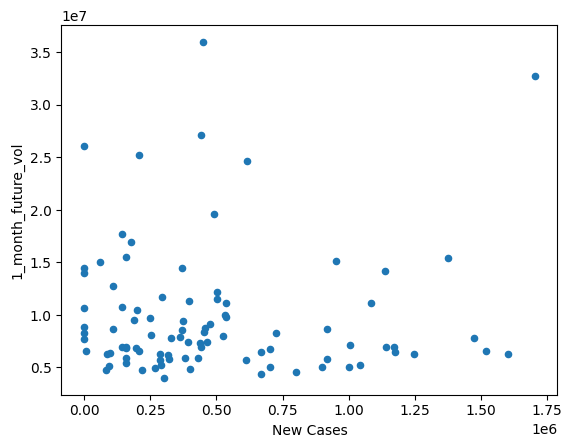

In [15]:
filtered_df.plot(kind='scatter', x='New Cases', y='1_month_future_vol')
plt.show()

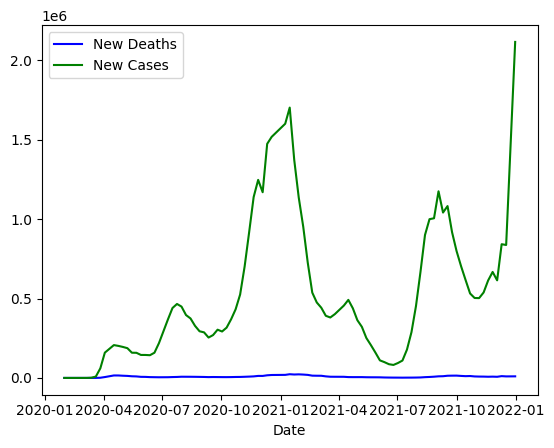

In [20]:
ax = filtered_df.plot("Date", "New Deaths", color="blue", label="New Deaths")
filtered_df.plot("Date", "New Cases", color="green", label="New Cases", ax=ax)
# ax.plot(filtered_df["Date"].values, filtered_df["New Cases"].values)
plt.legend()
plt.show()

In [18]:
filtered_df["Date"].values

array([datetime.date(2020, 1, 31), datetime.date(2020, 2, 7),
       datetime.date(2020, 2, 14), datetime.date(2020, 2, 21),
       datetime.date(2020, 2, 28), datetime.date(2020, 3, 6),
       datetime.date(2020, 3, 13), datetime.date(2020, 3, 20),
       datetime.date(2020, 3, 27), datetime.date(2020, 4, 3),
       datetime.date(2020, 4, 17), datetime.date(2020, 4, 24),
       datetime.date(2020, 5, 1), datetime.date(2020, 5, 8),
       datetime.date(2020, 5, 15), datetime.date(2020, 5, 22),
       datetime.date(2020, 5, 29), datetime.date(2020, 6, 5),
       datetime.date(2020, 6, 12), datetime.date(2020, 6, 19),
       datetime.date(2020, 6, 26), datetime.date(2020, 7, 10),
       datetime.date(2020, 7, 17), datetime.date(2020, 7, 24),
       datetime.date(2020, 7, 31), datetime.date(2020, 8, 7),
       datetime.date(2020, 8, 14), datetime.date(2020, 8, 21),
       datetime.date(2020, 8, 28), datetime.date(2020, 9, 4),
       datetime.date(2020, 9, 11), datetime.date(2020, 9, 18),


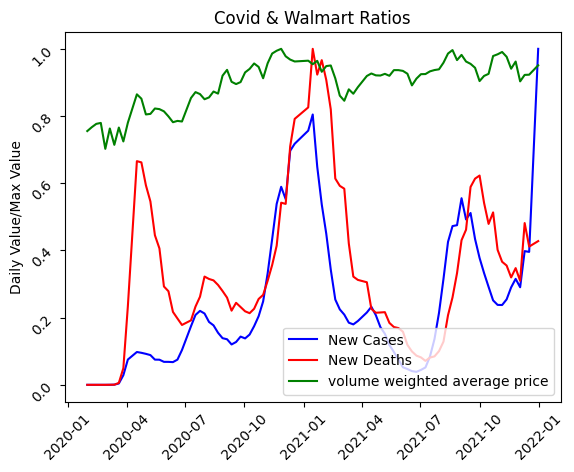

In [65]:
dates = filtered_df["Date"].values
scaled_new_cases = filtered_df["New Cases"].values / filtered_df["New Cases"].max()
scaled_new_deaths = filtered_df["New Deaths"].values / filtered_df["New Deaths"].max()
vwap = "volume weighted average price"
scaled_stock_price = filtered_df[vwap].values / filtered_df[vwap].max()


fig, ax = plt.subplots(1)
ax.plot(dates, scaled_new_cases, color="blue", label="New Cases")
ax.plot(dates, scaled_new_deaths, color="red", label="New Deaths")
ax.plot(dates, scaled_stock_price, color="green", label=vwap)
ax.legend(loc="lower right")
ax.tick_params(rotation=45)
ax.set_title("Covid & Walmart Ratios")
ax.set_ylabel("Daily Value/Max Value")
plt.savefig("Ratios.png")

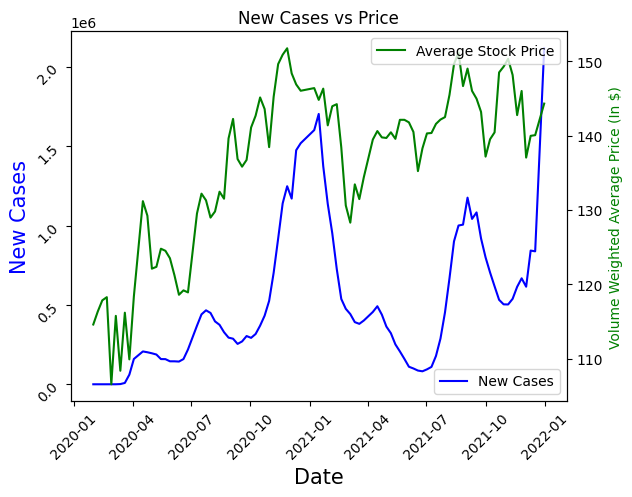

In [76]:
dates = filtered_df["Date"].values
scaled_new_cases = filtered_df["New Cases"].values 
scaled_new_deaths = filtered_df["New Deaths"].values 
vwap = "volume weighted average price"
scaled_stock_price = filtered_df[vwap].values 



fig,ax = plt.subplots()
ax.plot(dates, scaled_new_cases, color="blue", label="New Cases")
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("New Cases", color="blue", fontsize=15)
ax2=ax.twinx()
ax2.plot(dates, scaled_stock_price, color="green", label="Average Stock Price")
ax2.set_ylabel("Volume Weighted Average Price (In $)", color="green", fontsize=10)
plt.xticks(rotation=90)
ax.tick_params(rotation=45)
ax.legend(loc="lower right")
ax2.legend(loc="upper right")
ax.set_title("New Cases vs Price")

ax.legend(loc="lower right")
plt.savefig("New Cases vs Price.png")
plt.show()
